<a href="https://colab.research.google.com/github/sonia6301/coding/blob/main/sonia_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import plotly.express as px

# Define the URL and destination file
url = "https://raw.githubusercontent.com/tofighi/dataset/main/big-data/NWT_04_Clean_Data.csv"
destfile = "NWT_04_Clean_Data.csv"

# Download the file
response = requests.get(url)
with open(destfile, 'wb') as file:
    file.write(response.content)
print("Downloaded NWT_04_Clean_Data.csv")

# Read the data from the downloaded file
data = pd.read_csv(destfile)

# Ensure 'Port Number' column is formatted as two-digit strings if it exists
if 'Port Number' in data.columns:
    data['Port Number'] = data['Port Number'].apply(lambda x: f"{int(x):02d}")

# Plot data with 'Port Number' as color if the column exists
if 'Port Number' in data.columns:
    fig1 = px.scatter(data,
                      x='Standard Time (24 Hour) YYYY/MM/DD HH:MM:SS',
                      y='Pressure (psia)',
                      color='Port Number',
                      title=destfile,
                      color_continuous_scale=px.colors.sequential.Viridis)
    fig1.show()
else:
    print("'Port Number' column not found in the dataset.")

# Plot data with 'Probe Status' as color if the column exists
if 'Probe Status' in data.columns:
    fig2 = px.scatter(data,
                      x='Standard Time (24 Hour) YYYY/MM/DD HH:MM:SS',
                      y='Pressure (psia)',
                      color='Probe Status',
                      title=destfile,
                      color_continuous_scale=px.colors.sequential.Viridis)
    fig2.show()
else:
    print("'Probe Status' column not found in the dataset.")


Downloaded NWT_04_Clean_Data.csv


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



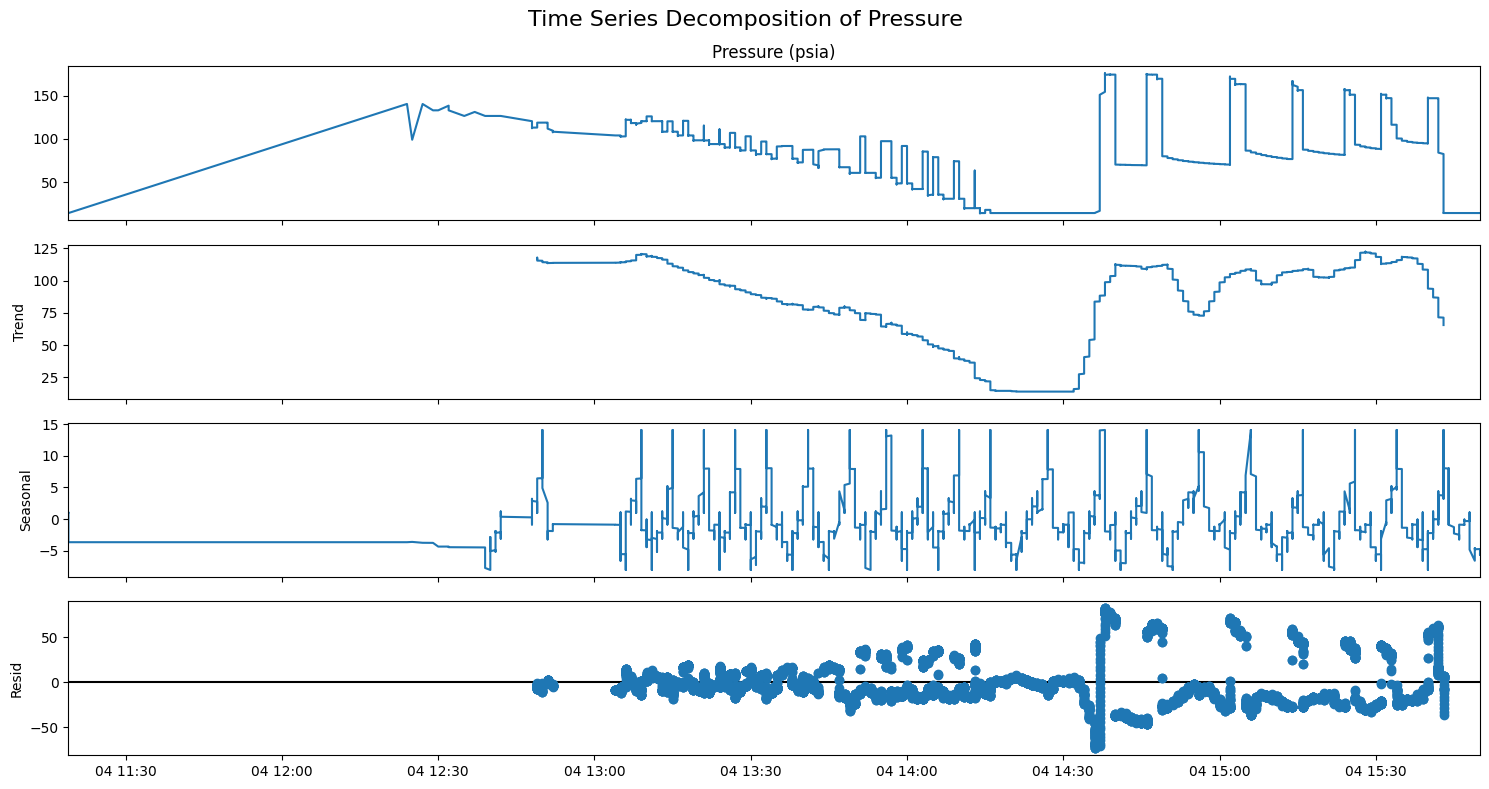

In [2]:
# prompt: now write a code to show trends in data, also add all available time series functions that could be useful in explaining the dataset

import matplotlib.pyplot as plt
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ... (previous code) ...

# Convert 'Standard Time' to datetime objects for time series analysis
data['Standard Time (24 Hour) YYYY/MM/DD HH:MM:SS'] = pd.to_datetime(data['Standard Time (24 Hour) YYYY/MM/DD HH:MM:SS'])
data.set_index('Standard Time (24 Hour) YYYY/MM/DD HH:MM:SS', inplace=True)

# Resample data to daily frequency and calculate mean pressure
daily_data = data['Pressure (psia)'].resample('D').mean()

# Plot daily average pressure trend
fig3 = px.line(daily_data, x=daily_data.index, y=daily_data.values,
              title='Daily Average Pressure Trend',
              labels={'x': 'Date', 'y': 'Average Pressure (psia)'})
fig3.show()

# Calculate rolling mean with a window of 7 days
rolling_mean = data['Pressure (psia)'].rolling(window=7).mean()

# Plot rolling mean alongside original data
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=data.index, y=data['Pressure (psia)'], name='Original Data'))
fig4.add_trace(go.Scatter(x=data.index, y=rolling_mean, name='7-Day Rolling Mean'))
fig4.update_layout(title='Pressure Trend with Rolling Mean',
                  xaxis_title='Date',
                  yaxis_title='Pressure (psia)')
fig4.show()

# Decompose time series to identify trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Pressure (psia)'], model='additive', period=365) # Assuming yearly seasonality

fig5 = result.plot()
fig5.set_size_inches(15, 8)
fig5.suptitle('Time Series Decomposition of Pressure', fontsize=16)
fig5.tight_layout()
fig5.show()

# Additional time series functions for further analysis:
# - Autocorrelation and Partial Autocorrelation Functions (ACF/PACF):
#     from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#     plot_acf(data['Pressure (psia)'])
#     plot_pacf(data['Pressure (psia)'])
#     plt.show()
# - Stationarity tests (Augmented Dickey-Fuller test):
#     from statsmodels.tsa.stattools import adfuller
#     result = adfuller(data['Pressure (psia)'])
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
# - Forecasting models (ARIMA, SARIMA, etc.):
#     from statsmodels.tsa.arima.model import ARIMA
#     # ... model fitting and forecasting ...
